Generate 3D bathymetry graphics from a binary file prepared for MITgcm submarine canyon simulations


In [1]:
#KRM

import matplotlib.pyplot as plt

import matplotlib.cm as cm

from mpl_toolkits.mplot3d.axes3d import Axes3D

import numpy as np

import os

import scipy.io


%matplotlib inline


Input:

In [2]:

filename = 'bathy_smooth_480x360_NonUni_2BarkleyCanyons.bin'  # filename of bathymetric data

xsize = 480 # number of grid points in x and y directions
ysize = 360

xwall = 14300.0 # Same as in GenerateCanyonBathy.ipynb. Length of the domain along x (m)
ywall = 9000.0  # Same as in GenerateCanyonBathy.ipynb. Length of the domain along y (m)

dt = np.dtype('>f8')  # float 64 big endian, this is the precision I used when writing the binary files for MITgcm


In [3]:
# Read bathymetry data

bb = np.fromfile(filename, dtype=dt) 

bathy = np.reshape(bb,[xsize,ysize],order='F')

#Generate XY meshgrid

xvec = np.arange(0,xwall,xwall/xsize)
yvec = np.arange(0,ywall,ywall/ysize)

X,Y = np.meshgrid(yvec,xvec,indexing='xy')



45 deg view at 30 (?) elevation

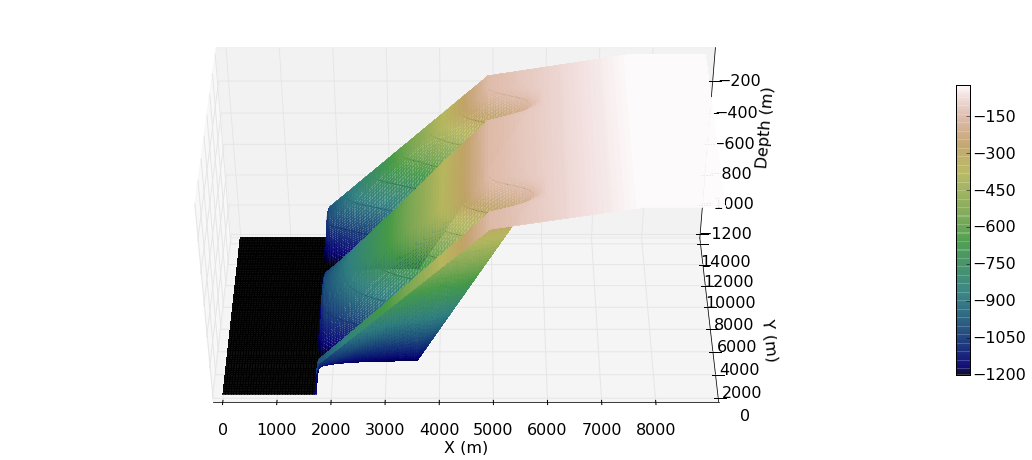

In [4]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':16})

# Plot 3D bathymetry

fig = plt.figure(figsize=(20,8))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_surface(X,Y,bathy, rstride=2, cstride=2,alpha=0.75,cmap=cm.gist_earth, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.65)
cset = ax.contour(X,Y,bathy,colors='k',linewidth=2, rstride=2, cstride=2,zdir='z')

ax.set_aspect('auto')

ax.view_init(40, -90) # elevation and azimuth

ax.set_ylabel('Y (m)')
ax.set_xlabel('X (m)')
ax.set_zlabel('Depth (m)')


Front view, 45 elevation:


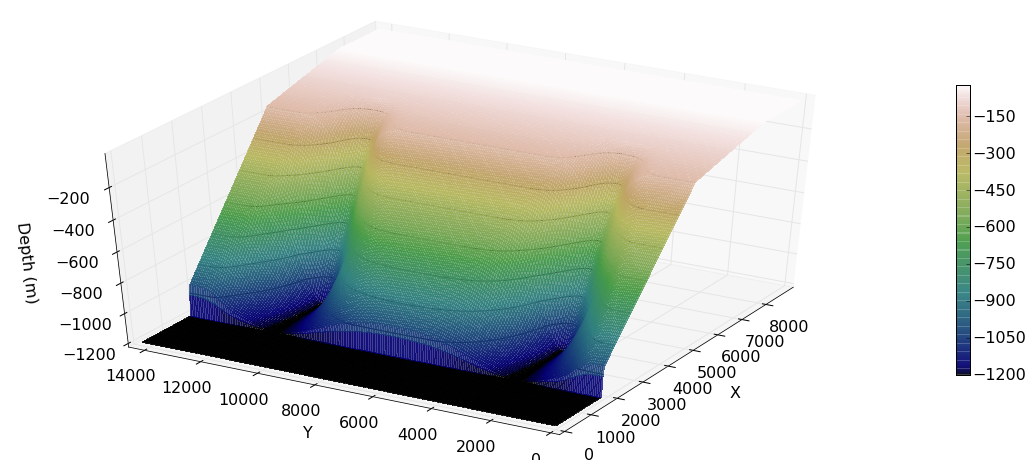

In [8]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines

# Plot 3D bathymetry

fig = plt.figure(figsize=(20,8))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_surface(X,Y,bathy, rstride=2, cstride=2,alpha=0.75,cmap=cm.gist_earth, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.65)
cset = ax.contour(X,Y,bathy,colors='k', rstride=2, cstride=2,zdir='z')

ax.set_aspect('auto')

ax.view_init(40, -150) # elevation and azimuth

ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlabel('Depth (m)')
